<a href="https://colab.research.google.com/github/IsmayilGasim/AI-Lesson-notes/blob/main/Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# K-Means

In [2]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

blob_centers = np.array([[0.2,2.3], [-1.5,2.3], [-2.8,1.8], [-2.8,2.8], [-2.8, 1.3]])

blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X,y = KMeans(n_samples=2000, centers=blob_centers, cluster_std=blob_std, random_state=7)

k=5
kmeans = KMeans(n_clusters=k,n_init=10, random_state=42) # 10 defe cehd veririk. en yaxsi neticeni qaytarir
y_pred = kmeans.fit_predict(X)

#

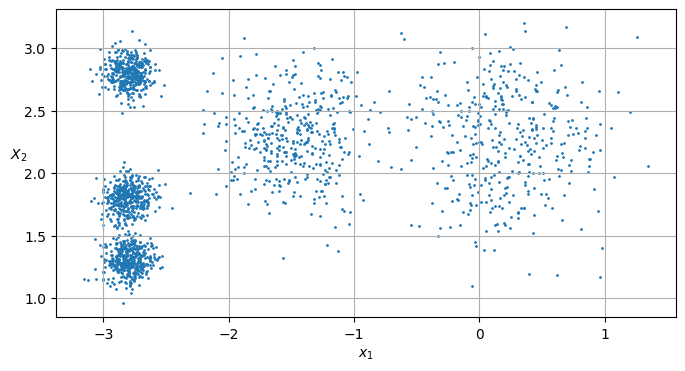

In [4]:
def plot_clusters(X,y=None):
  plt.scatter(X[:,0], X[:,1], c=y,s=1)
  plt.xlabel("$x_1$")
  plt.ylabel("$X_2$", rotation=0)

plt.figure(figsize=(8,4))
plot_clusters(X)
plt.grid()
plt.show()

In [5]:
y_pred

array([0, 0, 4, ..., 3, 1, 0], dtype=int32)

In [6]:
kmeans.labels_

array([0, 0, 4, ..., 3, 1, 0], dtype=int32)

In [8]:
y_pred is kmeans.labels_ # value ve type olaraq beraberdir. ve yaddasda eyni referansdir

True

In [9]:
kmeans.cluster_centers_ #kordinatlardir

array([[-2.80214068,  1.55162671],
       [ 0.08703534,  2.58438091],
       [-1.46869323,  2.28214236],
       [-2.79290307,  2.79641063],
       [ 0.31332823,  1.96822352]])

In [10]:
import numpy as np
X_new = np.array([[0,2],[3,2],[-3,3],[-3,2.5]])
kmeans.predict(X_new)

array([4, 4, 3, 3], dtype=int32)

In [11]:
X_new.shape, X.shape

((4, 2), (2000, 2))

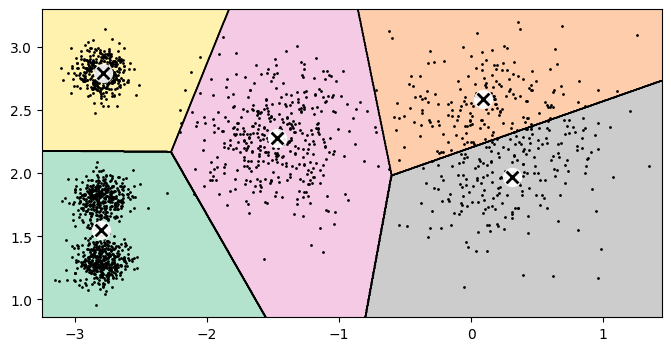

In [12]:
def plot_data(X):
   plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)


def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
   if weights is not None:
       centroids = centroids[weights > weights.max() / 10]
   plt.scatter(centroids[:, 0], centroids[:, 1],
               marker='o', s=35, linewidths=8,
               color=circle_color, zorder=10, alpha=0.9)
   plt.scatter(centroids[:, 0], centroids[:, 1],
               marker='x', s=2, linewidths=12,
               color=cross_color, zorder=11, alpha=1)


def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                            show_xlabels=True, show_ylabels=True):
   mins = X.min(axis=0) - 0.1
   maxs = X.max(axis=0) + 0.1
   xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                        np.linspace(mins[1], maxs[1], resolution))
   Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
   Z = Z.reshape(xx.shape)


   plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
               cmap="Pastel2")
   plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
               linewidths=1, colors='k')
   plot_data(X)
   if show_centroids:
       plot_centroids(clusterer.cluster_centers_)


   if show_xlabels:
       plt.xlabel("")
   else:
       plt.tick_params(labelbottom=False)
   if show_ylabels:
       plt.ylabel("", rotation=0)
   else:
       plt.tick_params(labelleft=False)


plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()


In [13]:
kmeans.transform(X_new).round(2)

array([[2.84, 0.59, 1.5 , 2.9 , 0.31],
       [5.82, 2.97, 4.48, 5.85, 2.69],
       [1.46, 3.11, 1.69, 0.29, 3.47],
       [0.97, 3.09, 1.55, 0.36, 3.36]])

In [14]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0,2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1, random_state=42)
kmeans.fit(X)

KMeans(init=array([[-3,  3],
       [-3,  2],
       [-3,  1],
       [-1,  2],
       [ 0,  2]]),
       n_clusters=5, n_init=1, random_state=42)

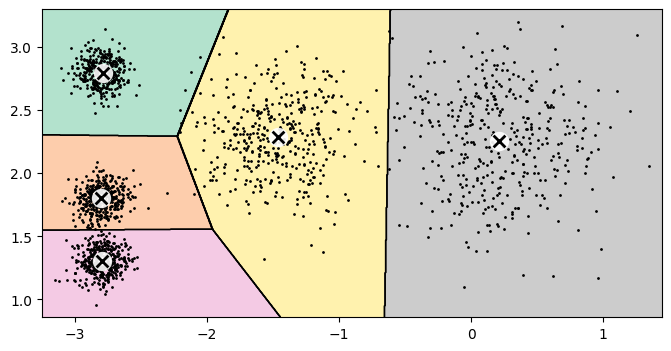

In [15]:
plt.figure(figsize=(8,4))
plot_decision_boundaries(kmeans, X)

In [16]:
kmeans.inertia_

211.59853725816828

In [17]:
kmeans.score(X)

-211.59853725816828

In [20]:
kmeans_rnd_10_inits = KMeans(n_clusters=5, init='random', n_init=10,
                             random_state=2)

kmeans_rnd_10_inits.fit(X)

KMeans(init='random', n_clusters=5, n_init=10, random_state=2)

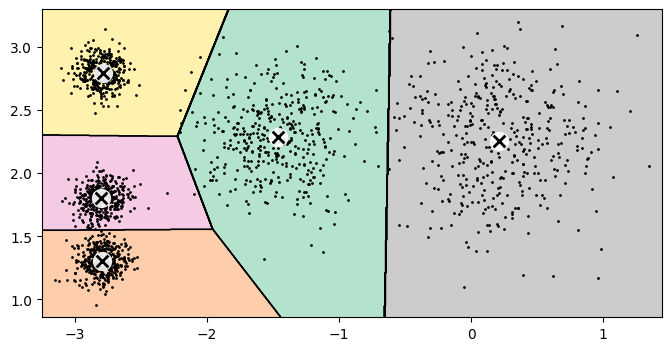

In [21]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_rnd_10_inits, X)
plt.show()

In [22]:
kmeans_rnd_10_inits.inertia_

211.59853725816828

formalar oval kimi olanda k-means daha yaxsi netice vermir

# Mini-Batch K-Means

In [23]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5, n_init=3, random_state=42)
minibatch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5, n_init=3, random_state=42)

In [24]:
# daha az data uzerinde isleyir. ama bu accuracy-ni asagi salir. daha suretlidir

In [25]:
minibatch_kmeans.inertia_

211.65899374574317

In [26]:
kmeans_k3 = KMeans(n_clusters=3, n_init=10, random_state=42)
kmeans_k8 = KMeans(n_clusters=8, n_init=10, random_state=42)

plt.show()

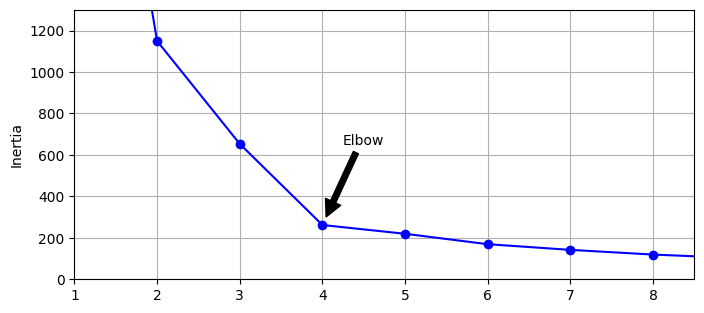

In [28]:
kmeans_per_k = [KMeans(n_clusters=k, n_init=10, random_state=42).fit(X) for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("")
plt.ylabel("Inertia")
plt.annotate("", xy=(4, inertias[3]), xytext=(4.45, 650),
             arrowprops=dict(facecolor='black', shrink=0.1))
plt.text(4.5, 650, "Elbow", horizontalalignment='center')
plt.axis([1, 8.5, 0, 1300])
plt.grid()
plt.show()

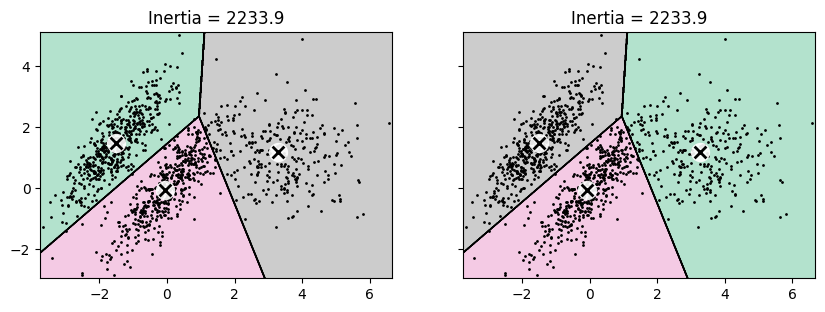

In [29]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4),(0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.347, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]             # r_ --> arraylari concat edir

kmeans_good = KMeans(n_clusters=3,
                     init=np.array([[-1.5, 2.5], [0.5, 0], [4, 0]]),
                     n_init=1, random_state=42)
kmeans_bad = KMeans(n_clusters=3, n_init=10, random_state=42)
kmeans_good.fit(X)
kmeans_bad.fit(X)

plt.figure(figsize=(10, 3.2))

plt.subplot(121)
plot_decision_boundaries(kmeans_good, X)
plt.title(f"Inertia = {kmeans_good.inertia_:.1f}")

plt.subplot(122)
plot_decision_boundaries(kmeans_bad, X, show_ylabels=False)
plt.title(f"Inertia = {kmeans_bad.inertia_:.1f}")

plt.show()

In [31]:
import PIL

image = np.asarray(PIL.Image.open("/content/download.png"))
image.shape

(533, 800, 3)

array([[[ 25,  29,   2],
        [ 24,  28,   1],
        [ 24,  29,   0],
        ...,
        [ 57, 105,  21],
        [ 56, 103,  22],
        [ 52,  99,  19]],

       [[ 24,  28,   1],
        [ 23,  27,   0],
        [ 23,  27,   0],
        ...,
        [ 60, 108,  22],
        [ 59, 106,  25],
        [ 55, 102,  22]],

       [[ 23,  27,   2],
        [ 22,  26,   1],
        [ 22,  26,   0],
        ...,
        [ 66, 114,  28],
        [ 63, 111,  27],
        [ 58, 105,  24]],

       ...,

       [[ 14,  18,   1],
        [ 14,  18,   1],
        [ 13,  20,   2],
        ...,
        [ 13,  61,   3],
        [  9,  56,   2],
        [  5,  51,   2]],

       [[ 14,  18,   1],
        [ 14,  18,   1],
        [ 12,  19,   1],
        ...,
        [ 11,  59,   1],
        [  7,  54,   0],
        [  3,  49,   0]],

       [[ 13,  17,   0],
        [ 13,  17,   0],
        [ 11,  18,   0],
        ...,
        [ 10,  58,   0],
        [  5,  52,   0],
        [  2,  48,   0]]], dtype=uint8)
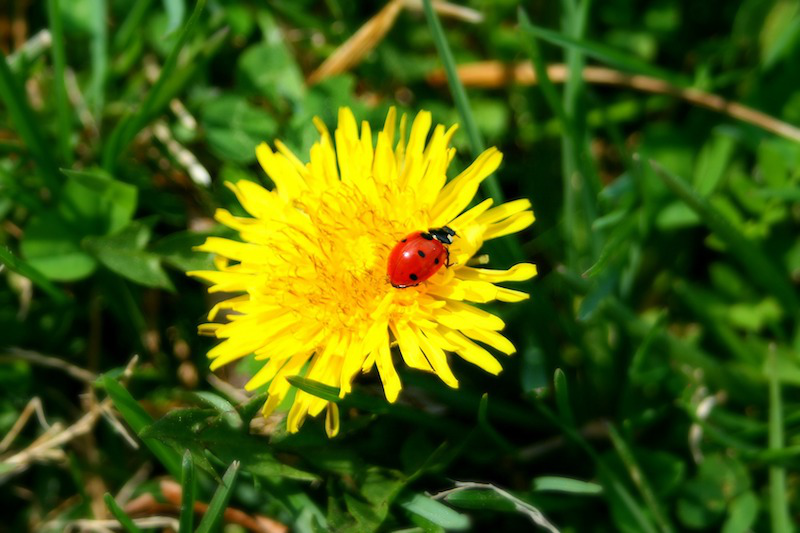

In [32]:
image

In [33]:
X = image.reshape(-1,3)
kmeans = KMeans(n_clusters=8, n_init=10, random_state=42).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape).astype('uint8')

In [34]:
X

array([[25, 29,  2],
       [24, 28,  1],
       [24, 29,  0],
       ...,
       [10, 58,  0],
       [ 5, 52,  0],
       [ 2, 48,  0]], dtype=uint8)

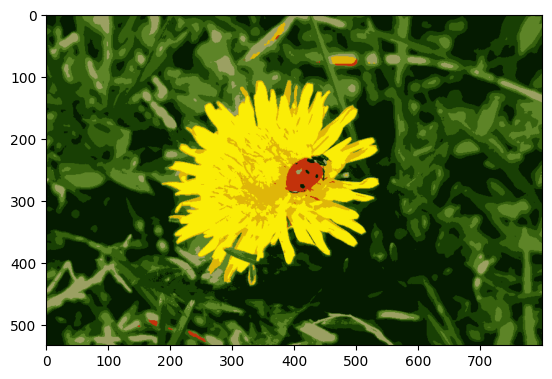

In [35]:
plt.imshow(segmented_img)

array([[[ 5, 27,  1],
        [ 5, 27,  1],
        [ 5, 27,  1],
        ...,
        [54, 97, 14],
        [54, 97, 14],
        [54, 97, 14]],

       [[ 5, 27,  1],
        [ 5, 27,  1],
        [ 5, 27,  1],
        ...,
        [54, 97, 14],
        [54, 97, 14],
        [54, 97, 14]],

       [[ 5, 27,  1],
        [ 5, 27,  1],
        [ 5, 27,  1],
        ...,
        [54, 97, 14],
        [54, 97, 14],
        [54, 97, 14]],

       ...,

       [[ 5, 27,  1],
        [ 5, 27,  1],
        [ 5, 27,  1],
        ...,
        [24, 63,  4],
        [24, 63,  4],
        [24, 63,  4]],

       [[ 5, 27,  1],
        [ 5, 27,  1],
        [ 5, 27,  1],
        ...,
        [24, 63,  4],
        [24, 63,  4],
        [ 5, 27,  1]],

       [[ 5, 27,  1],
        [ 5, 27,  1],
        [ 5, 27,  1],
        ...,
        [24, 63,  4],
        [24, 63,  4],
        [ 5, 27,  1]]], dtype=uint8)
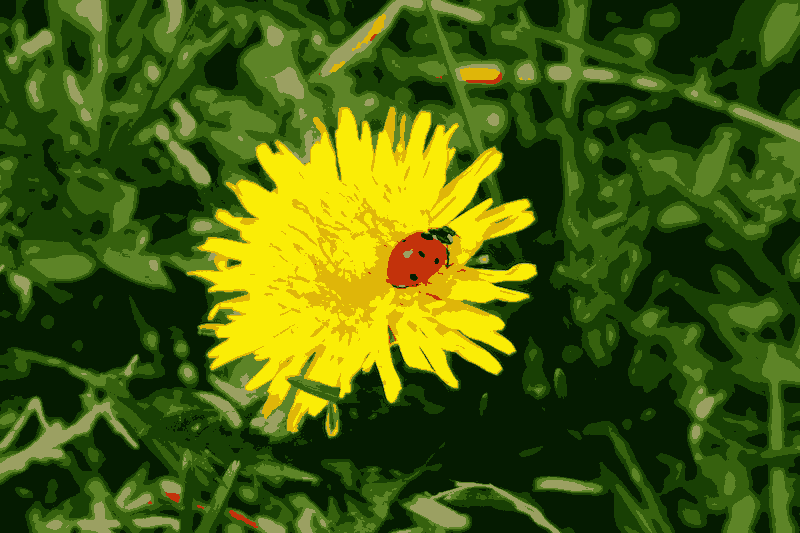

In [36]:
segmented_img

In [37]:
kmeans.cluster_centers_

array([[  5.6105612 ,  27.61743918,   1.44857047],
       [250.68280046, 237.8319458 ,   6.51237711],
       [ 54.37997208,  97.09151272,  14.07131629],
       [155.1122467 , 160.29920705,  98.37997063],
       [ 93.53208815, 132.47927103,  39.06947451],
       [ 24.39502109,  63.41611633,   4.09118396],
       [195.12454743,  50.81607531,  11.20057929],
       [223.40683449, 182.94424185,   9.39848253]])

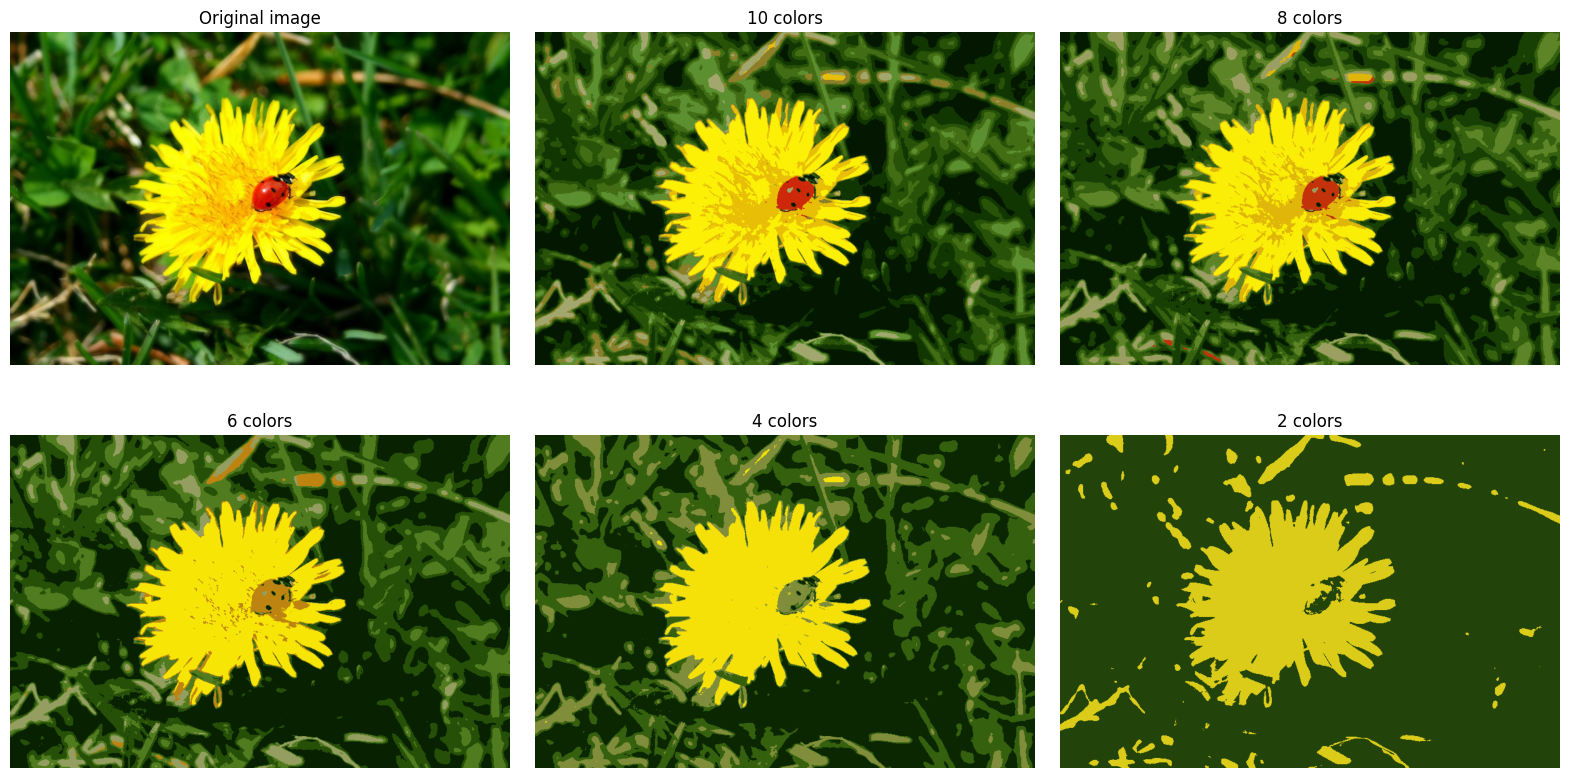

In [38]:
segmented_imgs = []

n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
  kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42).fit(X)
  segmented_img = kmeans.cluster_centers_[kmeans.labels_]
  segmented_imgs.append(segmented_img.reshape(image.shape))

plt.figure(figsize=(20, 10))
plt.subplots_adjust(wspace = 0.05, hspace=0.1)



plt.subplot(2, 3, 1)
plt.imshow(image)
plt.title('Original image')
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
  plt.subplot(2, 3, 2 + idx)
  plt.imshow(segmented_imgs[idx] / 255)
  plt.title(f"{n_clusters} colors")
  plt.axis('off')

plt.show()